In [5]:
#Loading libraries
library(tidyverse)
library(tidymodels)
set.seed(1234)

# Introduction to the dataset

Covid-19 is a respiratory disease caused by the virus SARS-CoV 2 (BC Center for Disease Control, n.d). Throughout the recent years, this disease has impacted multiple people, through its first diagnosis in 2019. It has caused a worldwide pandemic and has impacted individuals day to day life.

Coronavirus is highly contagious as it can spread from person to person very quickly. Individuals infected with this disease could experience symptoms such as shortness of breath, difficulty breathing, fever, fatigue, and much more. This disease can impact certain individuals more than others depending on preexisting health conditions.  

The goal of this project is to investigate the probability of individuals being infected with Covid-19 based on existing factors such as age, sex, obesity, asthma, cardiovascular disease, and diabetes. 

The dataset that we will be using to address the research question is from a Covid-19 dataset that has patients symptoms, status, and medical history. We will be using certain predictors such as age, sex, obesity, asthma, cardiovascular disease, and diabetes to predict the probability of individuals being infected with coronavirus. These predictors will be further explained in the methods section. 


# Preliminary Exploratory Data Analysis

**Familiarization with the data**

In [6]:
# Loading in the dataset
url <- "https://raw.githubusercontent.com/akshaj-24/DSCI_100_group07/main/data/CovidData.csv"
covid_data <- read_csv(url)
head(covid_data)

Rows: 1048575 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DATE_DIED
dbl (20): USMER, MEDICAL_UNIT, SEX, PATIENT_TYPE, INTUBED, PNEUMONIA, AGE, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,⋯,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,03/05/2020,97,1,65,2,2,⋯,2,2,1,2,2,2,2,2,3,97
2,1,2,1,03/06/2020,97,1,72,97,2,⋯,2,2,1,2,2,1,1,2,5,97
2,1,2,2,09/06/2020,1,2,55,97,1,⋯,2,2,2,2,2,2,2,2,3,2
2,1,1,1,12/06/2020,97,2,53,2,2,⋯,2,2,2,2,2,2,2,2,7,97
2,1,2,1,21/06/2020,97,2,68,97,1,⋯,2,2,1,2,2,2,2,2,3,97
2,1,1,2,9999-99-99,2,1,40,2,2,⋯,2,2,2,2,2,2,2,2,3,2


In [7]:
#Filtering and renaming classification, so that 1-3 is Covid and 4-7 is Non-Covid
covid_data <- covid_data |> 
            rename(Covid = CLASIFFICATION_FINAL) |>
            mutate(Covid = as_factor(Covid)) |>
            mutate(Covid = fct_recode(Covid, "Yes" = "1", "Yes" = "2", "Yes" = "3", "No" = "4", "No" = "5", "No" = "6", "No" = "7")) |>
            mutate(Covid = as_factor(Covid))
head(covid_data)

USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,⋯,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Covid,ICU
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,1,1,1,03/05/2020,97,1,65,2,2,⋯,2,2,1,2,2,2,2,2,Yes,97
2,1,2,1,03/06/2020,97,1,72,97,2,⋯,2,2,1,2,2,1,1,2,No,97
2,1,2,2,09/06/2020,1,2,55,97,1,⋯,2,2,2,2,2,2,2,2,Yes,2
2,1,1,1,12/06/2020,97,2,53,2,2,⋯,2,2,2,2,2,2,2,2,No,97
2,1,2,1,21/06/2020,97,2,68,97,1,⋯,2,2,1,2,2,2,2,2,Yes,97
2,1,1,2,9999-99-99,2,1,40,2,2,⋯,2,2,2,2,2,2,2,2,Yes,2


In [8]:
#Splitting data 

covid_split <- initial_split(covid_data, prop = 0.75, strata = Covid)
covid_training <- training(covid_split)
covid_testing <- testing(covid_split)

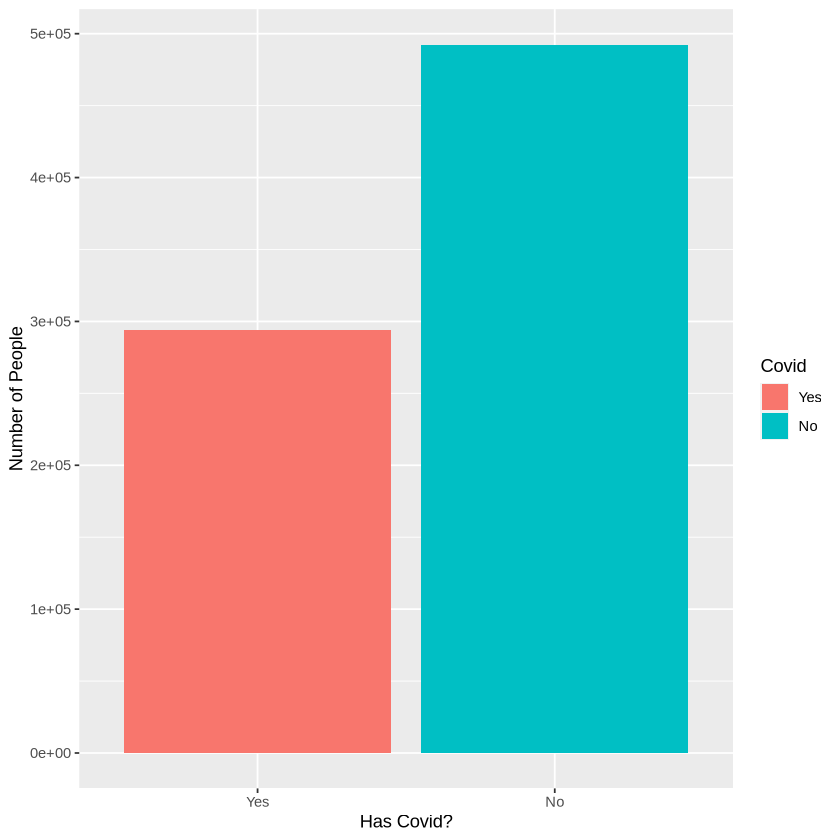

In [9]:
#plot showing covid vs non covid
covid_vs_noncovid <- ggplot(covid_training, aes(x=Covid, fill=Covid)) +
                geom_bar() +
                labs(x= "Has Covid?",
                    y= "Number of People",
                    colour = "Covid")


covid_vs_noncovid

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


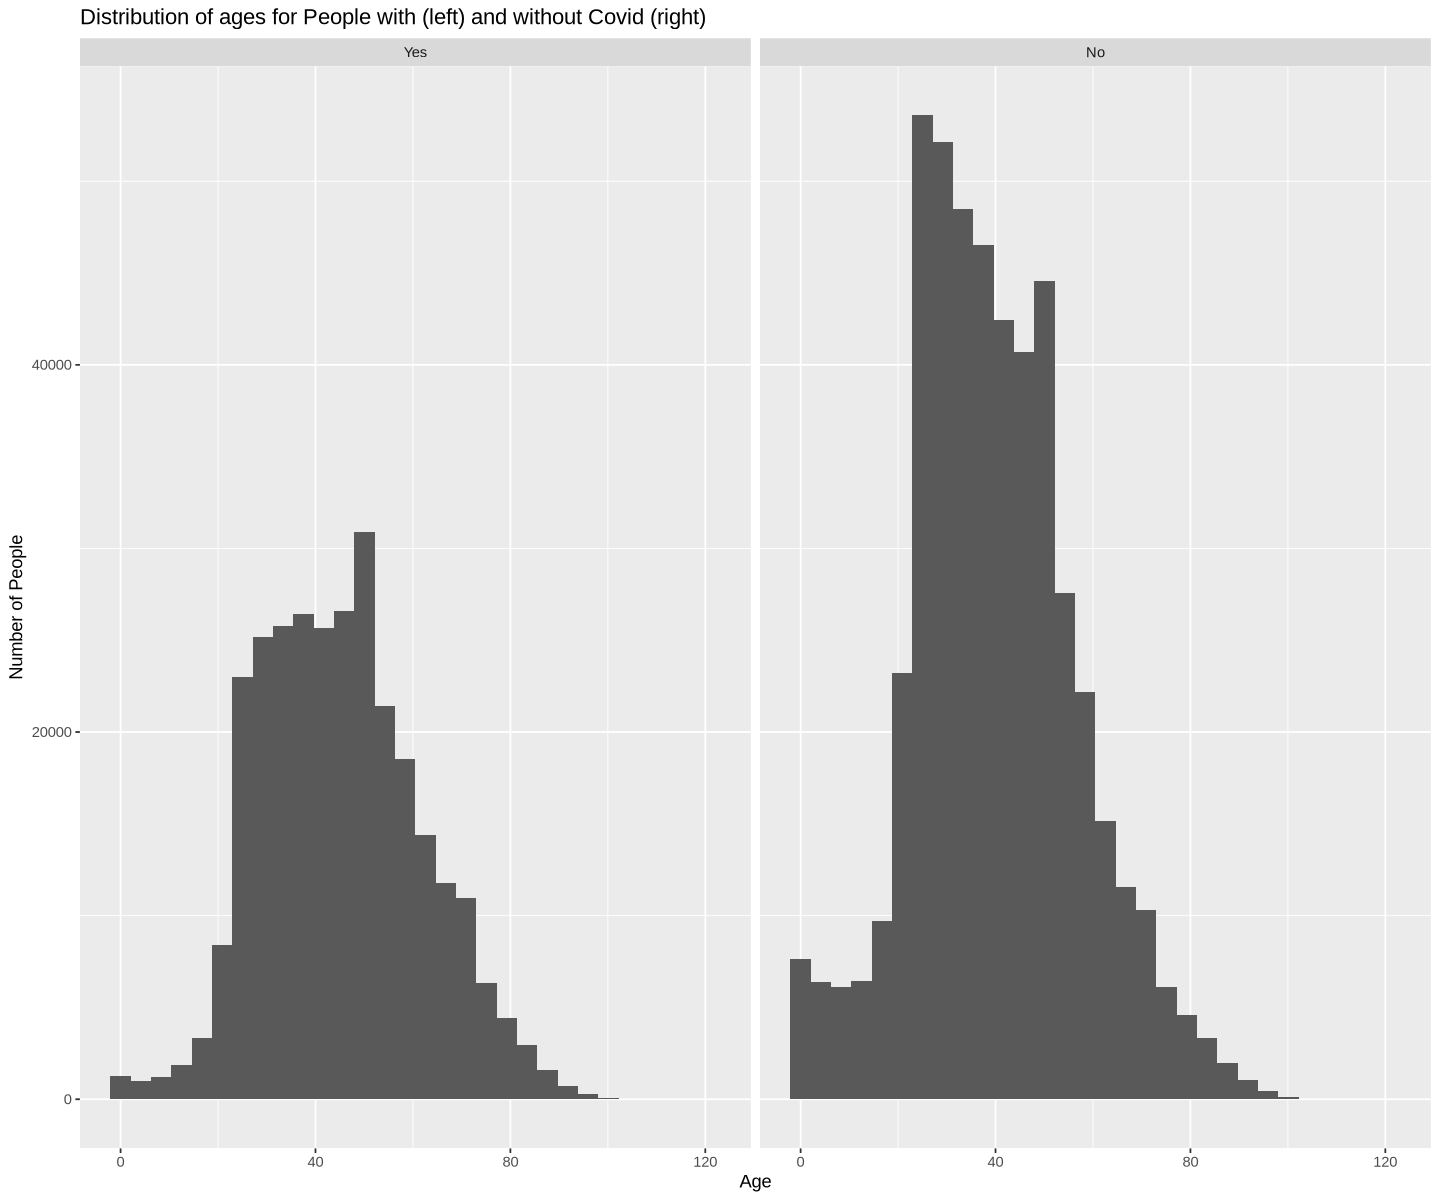

In [10]:
#Plot for Histogram by age for covid carriers and non covid
options(repr.plot.width = 12, repr.plot.height = 10)

#increase plot size
#add labs
#add interpretation in markdown cell afterwords

covid_by_age <- ggplot(covid_training, aes(x=AGE)) +
                geom_histogram(position = "identity") +
                facet_grid(cols = vars(Covid)) +
                labs(x= "Age",
                    y= "Number of People") +
                ggtitle("Distribution of ages for People with (left) and without Covid (right)")
covid_by_age

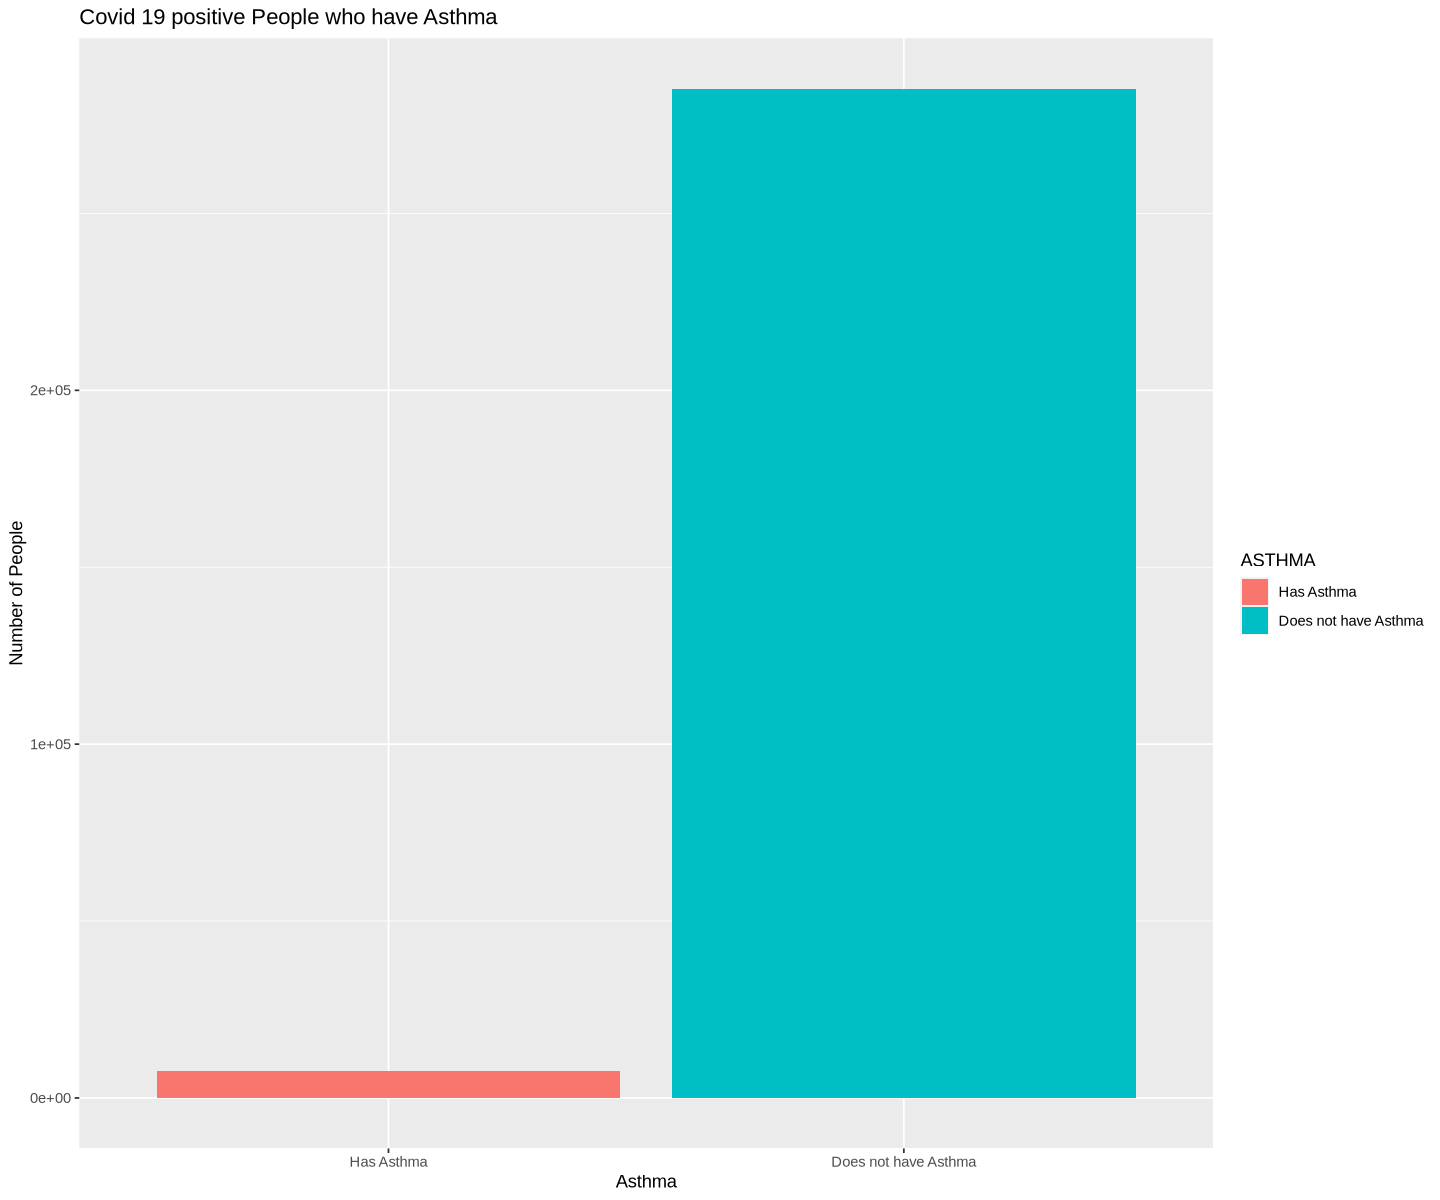

In [11]:

#plot for asthma in covid carriers (Scatter plot)
asthma_covid <- covid_training |>
                filter(Covid == "Yes") |>
                filter(ASTHMA <= 2) |>
                mutate(ASTHMA = as_factor(ASTHMA)) |>
                mutate(ASTHMA = fct_recode(ASTHMA, "Has Asthma" = "1", "Does not have Asthma" = "2")) |>
                ggplot(aes(x=ASTHMA, fill = ASTHMA)) + 
                # scale_x_continuous(labels = label_comma()) + 
                # scale_y_continuous(labels = label_comma()) +
                geom_bar() +
                labs(x= "Asthma",
                    y= "Number of People",
                    colour = "Asthma") +
                ggtitle("Covid 19 positive People who have Asthma")

asthma_covid

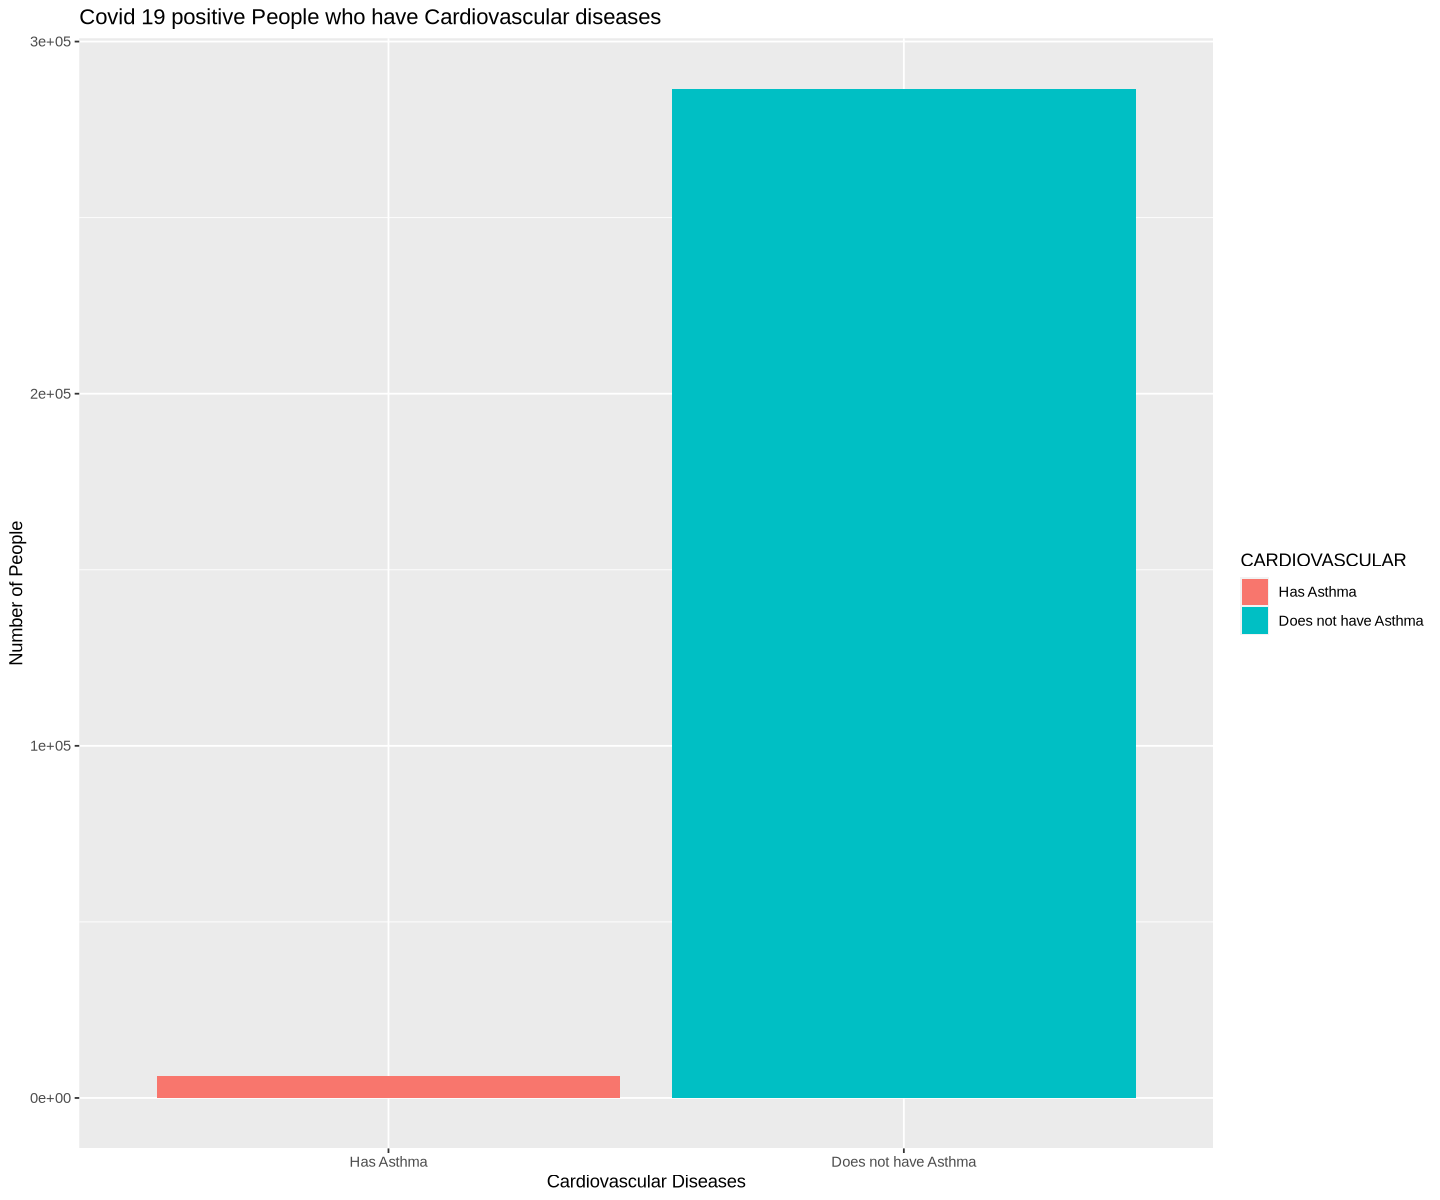

In [12]:
#plot for asthma in covid carriers (Scatter plot)
cardiovascular_covid <- covid_training |>
                filter(Covid == "Yes") |>
                filter(CARDIOVASCULAR <= 2) |>
                mutate(CARDIOVASCULAR = as_factor(CARDIOVASCULAR)) |>
                mutate(CARDIOVASCULAR = fct_recode(CARDIOVASCULAR, "Has Asthma" = "1", "Does not have Asthma" = "2")) |>
                ggplot(aes(x=CARDIOVASCULAR, fill = CARDIOVASCULAR)) + 
                # scale_x_continuous(labels = label_comma()) + 
                # scale_y_continuous(labels = label_comma()) +
                geom_bar() +
                labs(x= "Cardiovascular Diseases",
                    y= "Number of People",
                    colour = "Cardiovasular Diseases") +
                ggtitle("Covid 19 positive People who have Cardiovascular diseases")

cardiovascular_covid

From the previous plots we can see that :
- Around 300K people in the dataset have COVID and 500K do not. This is a split of 37% covid carriers.
- Average age of people with COVID lies between 45-50 and majority of people are > 40 years of age.
- It can also be observed that only a few people who have Covid have ASTHMA or CARDIOVASCULAR DISEASES.

# Methods

The data we are using for this project is from “data/CovidData.csv” (dataset was provided by the Mexican government) to predict if individuals have a higher probability of being diagnosed with Covid 19 with the following predictors which are found in our data set.  In total, the data set contained 21 predictors. 

Boolean features: 1 = Yes, 2 = No 

Missing data is represented by 97 and 99 

**USMR**: if patient treated medical units of the first, second or third level

**Medical unit**: type of institution of the National Health System that provided the care

**Sex**: sex (1: Female, 2: Male) 

**Patient type**: type of care patients received (1: Returned home, 2: Hospitalization) 

**Date died**: indicate the date of death (If patient died), 9999-99-99 otherwise

**Intubed**: if patient was connected to the ventilator or not (1: Yes, 2: No)

**Pneumonia**: if patient has air sacs inflammation or not (1: Yes, 2: No)

**Age**: age of patients

**Pregnancy**: if patient was pregnant or not (1: Yes, 2: No) 

**Diabetes**: if patient has diabetes or not (1: Yes, 2: No) 

**Copd**: if patient has Chronic obstructive pulmonary diseases or not (1: Yes, 2: No) 

**Asthma**: if patient has asthma or not (1: Yes, 2: No) 

**Inmsupr**: if patient has immunosuppressed or not (1: Yes, 2: No)

**Hypertension**: if patient has hypertension or not (1: Yes, 2: No)

**Other disease**: if patient has other disease or not (1: Yes, 2: No)

**Cardiovascular**: if patient has heart or blood vessels related disease (1: Yes, 2: No)

**Obesity**: if patient has obesity or not (1: Yes, 2: No)

**Renal chronic**: if patient has chronic renal disease or not (1: Yes, 2: No)

**Tobacco**: if patient is a tobacco user or not (1: Yes, 2: No)

**Classification**: ranges from 1- 4 of covid test findings (1-3: Covid in different degrees, 4: Test was inconclusive / Patient not a carrier of covid) 

**ICU**: Indicates whether the patient had been admitted to an Intensive Care Unit ​​(1: Yes, 2: No)

To clean the data, we first renamed the findings in the classification column (**CLASSIFICATION_FINAL**). The classification column had values of 1-7. We got rid of the numbers and replaced it as yes and no. **1-3 as yes that patient got covid**, **4-7 as no the patient did not get covid**. A new column called Covid has been mutated to identify if patients got covid or not. 

For visualization, we currently generated 3 graphs in total, 2 bar graphs and 1 histogram. The first bar graph shows the comparison of the covid carriers vs number of non covid carriers. The second graph was 2 histograms respectively showing the **age distribution** of covid carriers and another with non covid carriers. The third graph we currently have shows the number of covid carriers with asthma or not. 

We choose **sex, age, obesity, asthma, cardiovascular disease, and diabetes** as predictors for this project since these are more common diseases / symptoms that may increase the probability of someone getting diagnosed with covid more easily. 

# Expected Outcomes and Significance 

There is a variety of influences of a person that could be a stronger predictor towards Covid-19. The data selected focuses on age, sex, asthma, diabetes, cardiovascular disease, and obesity and what the expected outcomes of these aspects are that could help predict the possibility of someone having Covid. 
The increase of age causes a natural weakening of the body’s immune system, which would cause people to be more vulnerable to sickness. This allows the expectation of those who are older would be more likely to have covid compared to younger individuals. 

Based on lifestyle, behavioral and occupational risk factors, when it comes to sex, males could be expected to be more likely to contract Covid-19 compared to females. Additionally, factors such as hormones, genes, and anatomy can increase the risk of males to different diseases, in this case, Covid-19. 
Patients with underlying conditions such as diabetes, cardiovascular disease, and/or obesity would be considered a risk group for Covid-19, therefore it is expected that those factors would have a positive correlation with developing Covid-19. Compared to individuals without these underlying conditions, their health problems impair the patients’ body to effectively fight off infections or viruses. 

It might be expected that there could be a minimal correlation between those with asthma being more at risk of developing Covid-19. This is because asthma is a chronic lung disease that causes symptoms like coughing, shortness of breath, etc… The symptoms resemble that of Covid-19, however might not indicate an increased risk in developing the disease. However, those who have asthma would be at more danger if they do contract the disease, as it would worsen the pre-existing asthmatic symptoms. 

What impacts should this have: Analysis of the Covid-19 data is significant as it would create a more reliable predictor and could be used to limit the spread of the virus as extra precautions would be made to protect those who are more susceptible. Additionally, it could provide a general understanding of what the disease could stem from since it establishes the risk groups, which could lead to exploration of the disease itself.

This research can pose exploratory questions such as: 
- What is the largest factor contributing to the spread of Covid-19?
- Is there a specific group of people that require the highest level of medical units?
- Are individuals who have been infected with Covid-19 more suseptible to other diseases? 

# Bibliography 

About covid-19. BC Centre for Disease Control. (n.d.). http://www.bccdc.ca/health-info/diseases-conditions/covid-19/about-covid-
        19#:~:text=COVID%2D19%20is%20a%20respiratory%20disease%20caused%20by%20the%20virus,a%20pandemic%20in%20March%202020.  

Nizri, M. (2022, November 13). Covid-19 dataset. Kaggle. https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download  